Aqib sher 01-134212-089


#Libraries.

In [58]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

#Load an image


In [15]:
image = cv2.imread('/content/sample-image.jpg')


#Brightness Adjustment

In [ ]:
# prompt: Use OpenCV to adjust the brightness of the image.
# Hint: Increase pixel values to brighten or decrease to darken.

def adjust_brightness(image, brightness_factor):

  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)

  v = cv2.add(v, brightness_factor)
  v[v > 255] = 255
  v[v < 0] = 0

  final_hsv = cv2.merge((h, s, v))
  img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
  return img


In [ ]:
brighter_image = adjust_brightness(image, 50)

# Display the original and brighter images
cv2_imshow(image)
cv2_imshow(brighter_image)

# Save the brighter image (optional)
cv2.imwrite('brighter_image.jpg', brighter_image)

Output hidden; open in https://colab.research.google.com to view.

#Contrasting an image

In [17]:

image_float = np.float32(image)

# Define the alpha and beta values
alpha = 2.0  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)

# Apply contrast and brightness adjustment
new_image = alpha * image_float + beta

# Clip the values to stay within valid range [0, 255]
new_image = np.clip(new_image, 0, 255)

# Convert back to uint8
new_image = np.uint8(new_image)

# Display the original and adjusted images
print("Original image")
cv2_imshow(image)
print("Contrasted image")
cv2_imshow(new_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

#Gamma Correction

In [18]:
# Convert the image to float32 and normalize to the range [0, 1]
image_float = image / 255.0

# Define the gamma value
gamma = 2.2  # You can adjust this value for different results

# Apply gamma correction
gamma_corrected = np.power(image_float, 1.0 / gamma)

# Convert back to [0, 255] and uint8
gamma_corrected = np.uint8(gamma_corrected * 255)

# Display the original and gamma-corrected images
print("Original Image")
cv2_imshow(image)

print("Gamma Corrected Image")
cv2_imshow(gamma_corrected)


Output hidden; open in https://colab.research.google.com to view.

#Inverse Transformation (Negative)

In [19]:

# Convert the image to its negative
negative_image = 255 - image
print("Negative Image")
cv2_imshow(negative_image)


Output hidden; open in https://colab.research.google.com to view.

#Dadiac operations.

###Loading two images.

In [31]:
image1 = cv2.imread('/content/imahe1.jpg')
image2 = cv2.imread('/content/iamhe2.jpg')

###Resize image.

In [32]:
# Resize the images to be the same size
image1 = cv2.resize(image1, (400, 400))
image2 = cv2.resize(image2, (400, 400))

###a) Addition.

Effect of Addition: The two images are blended, making brighter pixels where both images are light.


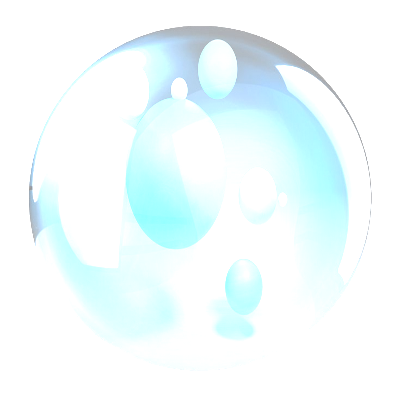

In [33]:
added_image = cv2.add(image1, image2)
print("Effect of Addition: The two images are blended, making brighter pixels where both images are light.")
cv2_imshow(added_image)

Effect: Combines the pixel values of both images, producing a brighter result where both images are light.

###b) Subtraction

Effect of Subtraction: The difference between the pixel values of the images is shown, highlighting changes.


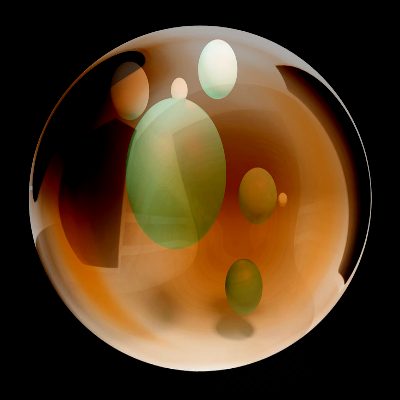

In [34]:
subtracted_image = cv2.subtract(image1, image2)
print("Effect of Subtraction: The difference between the pixel values of the images is shown, highlighting changes.")
cv2_imshow(subtracted_image)

Effect: Shows the difference between the images, highlighting the regions where the two images differ in pixel intensity.

###c) Multiplication

Effect of Multiplication: Pixel values are multiplied, creating a darker image where dark pixels dominate.


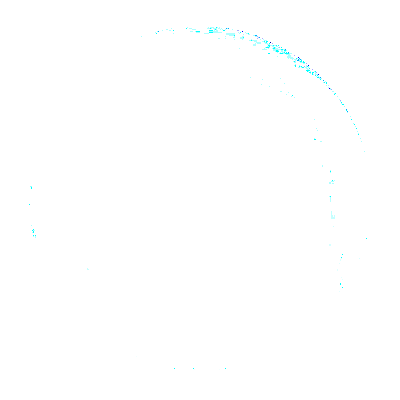

In [35]:
multiplied_image = cv2.multiply(image1, image2)
print("Effect of Multiplication: Pixel values are multiplied, creating a darker image where dark pixels dominate.")
cv2_imshow(multiplied_image)

Effect: Multiplies the pixel values, which darkens the image, especially where one or both images have darker areas.

### d) Division

Effect of Division: Divides pixel values, creating an image where brighter pixels in one image stand out.


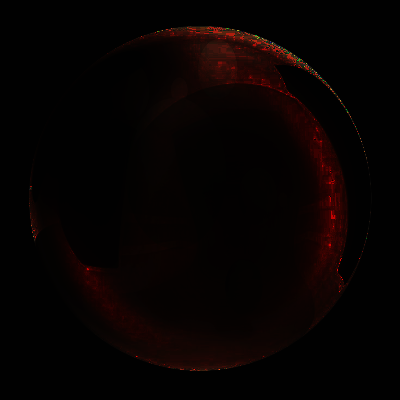

In [36]:
divided_image = cv2.divide(image1, image2)
print("Effect of Division: Divides pixel values, creating an image where brighter pixels in one image stand out.")
cv2_imshow(divided_image)

Effect: Divides the pixel values, producing an image where bright pixels in one image are highlighted compared to darker regions.

#Task3 - Green Screen Effect

### Step 1: Load the foreground (green screen) image and background image

In [47]:
foreground_image = cv2.imread('/content/greenscreen.jpg')
background_image = cv2.imread('/content/backgroundimage.jpg')

###Resize the background image to match the size of the foreground

In [49]:
background_image = cv2.resize(background_image, (foreground_image.shape[1], foreground_image.shape[0]))

### Step 2: Convert the foreground image from BGR to HSV

In [50]:
hsv_image = cv2.cvtColor(foreground_image, cv2.COLOR_BGR2HSV)



### Step 3: Define the HSV range for green

In [51]:

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

### Step 4: Create a mask to detect the green color

In [52]:
mask = cv2.inRange(hsv_image, lower_green, upper_green)

###Step 5: Invert the mask to get the object (non-green area)

In [53]:

mask_inv = cv2.bitwise_not(mask)


### Step 6: Extract the object (foreground) without the green background

In [54]:
fg_part = cv2.bitwise_and(foreground_image, foreground_image, mask=mask_inv)

### Step 7: Extract the corresponding region from the background image

In [55]:
bg_part = cv2.bitwise_and(background_image, background_image, mask=mask)

### Step 8: Combine the foreground and background

In [56]:
final_image = cv2.add(fg_part, bg_part)

### Step 9: Display the final result

Foreground with new background:


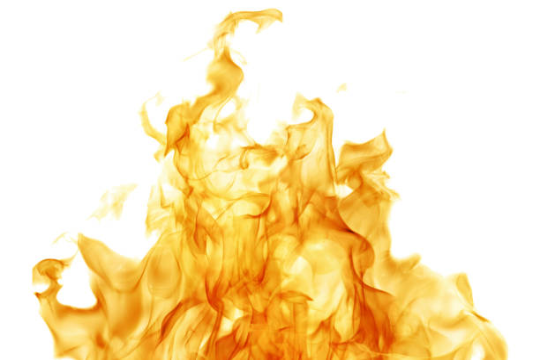

In [57]:
print("Foreground with new background:")
cv2_imshow(final_image)


#Task4 - Vehicle motion detection.

### Load the two images

In [59]:
image1_path = '/content/image1.png'
image2_path = '/content/image2.png'

### Read the images

In [60]:
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

### Convert to grayscale

In [61]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

### Step 1: Subtract the two images

In [62]:
diff_image = cv2.absdiff(gray_image1, gray_image2)

### Step 2: Thresholding to highlight moving areas

In [63]:
_, thresh_image = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

### Plot the results

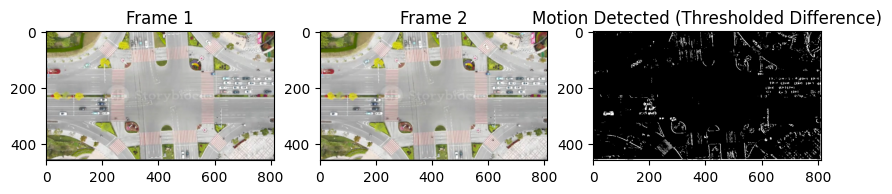

In [64]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title('Frame 1')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Frame 2')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Motion Detected (Thresholded Difference)')
plt.imshow(thresh_image, cmap='gray')

plt.show()


##Analysis

From the processed result:

* The thresholded difference image highlights areas of motion between the two frames.
* We can observe motion primarily on the left side (bottom-left lanes) and some areas on the right side (top-right lanes), indicating that vehicles are moving in those lanes. This suggests that the traffic lights for these lanes are likely green, allowing traffic to flow.


In contrast, there is little to no motion detected in the top-left and bottom-right lanes, indicating that the traffic in these directions is likely stopped due to a red signal.



**Thus, it appears that the left-side lanes (in both directions) and some right-side lanes are open for traffic.**